## 시계열(Time Series) 분석
* 시계열 자료(time series)
    * 년도별 계절별 월별 일별 시 분 초별로 시간의 흐름에 따라 관측된 자료
* 시계열자료의 분석 목적:
    * 1) (forecast) 미래에 대한 예측
    * 2) 시스템 또는 확률과정의 이해와 제어(control)


### datetime 오브젝트
* 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
* 날짜를 처리하는 date 오브젝트
* 시간을 처리하는 time 오브젝트
* 날짜와 시간을 처리하는 datetime 오브젝트가 포함되어 있다.

In [1]:
# from 모듈 이름 import 모듈 함수
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

2023-06-19 15:45:38.646198


In [3]:
now2 = datetime.today()
print(now2)

2023-06-19 15:45:38.661163


In [4]:
t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2023-06-19 15:45:38.681105
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
# datetime 객체에서 datetime 객체를 빼면 시간이 나옴
# datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산을 할 수 있음
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19527 days, 15:45:38.681105
<class 'datetime.timedelta'>


## 문자열을 datetime 오브젝트로 변환하기

- 시계열 데이터를 문자열로 저장 --> 시간 계산을 할 수 없기 때문에
- datetime 오브젝트로 변환해 주어야 함
- to_datatime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환

In [6]:
import pandas as pd
import os
ebola = pd.read_csv('../data/python_data/country_timeseries.csv')
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [7]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [8]:
#year을 기준으로 확인
test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})
test_df1['date_dt1']  = pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']  = pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_dt3']  = pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')
print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [9]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


## 시계열 데이터를 구분해서 추출

In [10]:
#now 메서드는 정밀한 시간 단위까지 표현
now = datetime.now()
now

datetime.datetime(2023, 6, 19, 15, 45, 39, 630112)

In [11]:
#strftime 메서드와 시간 형식 지정자를 이용하여 시계열 데이터를 추출하는 방법
# 년 월 일을 추출
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2023-06-19


In [12]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

15:45:39


In [13]:
# 시간 형식 지정자
nowTime = now.strftime('%Y-%m-%d %H:%M:%S %A %a')
print(nowTime)

2023-06-19 15:45:39 Monday Mon


## datetime 오브젝ㅌ로 변환하려는 열을 지정하여 데이터 집합 불러오기
- 위에서는 to_datetime 메서드를 사용하여 문자열로 저장된 Date열을 datetime 오브젝트로 변환
- parse_date 옵션을 부여하여 문자열을 datetime으로 불러올 수 있다

In [14]:
ebola1 = pd.read_csv('../data/python_data/country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## datetime 오브젝트에서 날짜 정보 추출하기
- datetime 오브젝트에는 년,월,일과 같은 날짜 정보가 따로 저장되어 있음(속성 존재)
- datetime 오브젝트에서 날짜 정보를 추출

In [15]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [16]:
d1[0].year

2018

In [17]:
d1[0].month

5

In [18]:
d1[0].day

16

## dt 접근자로 시계열 데이터 정리하기
* datetime 오브젝트를 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터를 처리할 수 있음

In [19]:
ebola = pd.read_csv('../data/python_data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.head(2)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04


In [20]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [21]:
# dt 접근자를 사용하지 않고, 인덱스가 3인 데이터의 년, 월, 일 추출
print(ebola['date_dt'][3].month)

1


In [22]:
print(ebola['date_dt'][3].day)

2


In [23]:
print(ebola['date_dt'][3].year)

2015


In [24]:
# dt 접금자로 date_dt 열에 접근한 다음 year 속성을 이용
# 추출한 year을 ebola df의 새로운 열(year)추가

ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [25]:
#dt.month, dt.day 접근자를 이용하여 월,일 데이터를 추출, 새로운 열(month,day)로 추가

ebola['month'],ebola['day'] = (ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)

print(ebola[['Date','date_dt','year','month','day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [26]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 에볼라 최초 발병일 계산하기

In [27]:
# 데이터가 시간 역순으로 정렬되어 있음
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [28]:
#datetime에 있는 min 메서드를 사용하여 에볼라 최초 발병일 확인
print(ebola['date_dt'].min())
print(ebola['date_dt'].max())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
2015-01-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [29]:
# Date열에서 에볼라 최초 발병일을 빼면 에볼라 진행 정도를 알 수 잇음
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


## 파산한 은행의 개수 계산하기

In [30]:
#closing date, update date 열은 데이터 자료형은 시계열 데이터임을 알 수 있다
banks = pd.read_csv('../data/python_data/banklist.csv')
print(banks.head())
print(banks.info())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column  

In [31]:
banks = pd.read_csv('../data/python_data/banklist.csv',parse_dates=[5,6])
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05
...,...,...,...,...,...,...,...
550,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2014-08-19
551,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,2002-11-18
552,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,2003-02-18
553,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2005-03-17


In [32]:
banks['closing_quarter'],banks['closing_year'] = (banks['Closing Date'].dt.quarter,
                                                 banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [33]:
#groupby 메서드를 사용하면 연도별로 파산한 은행의 개수를 알 수 있음
closing_year = banks.groupby(['closing_year']).size()

print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [34]:
# 연도별로 그룹화한 다음 다시 분기별로 그룹화
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

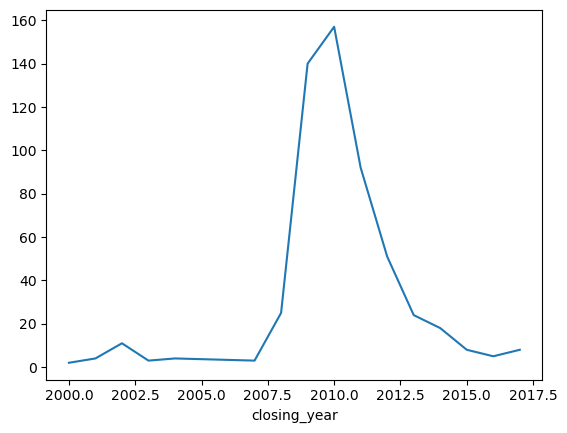

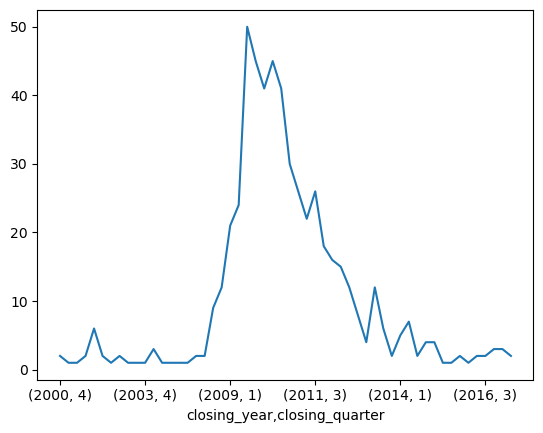

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

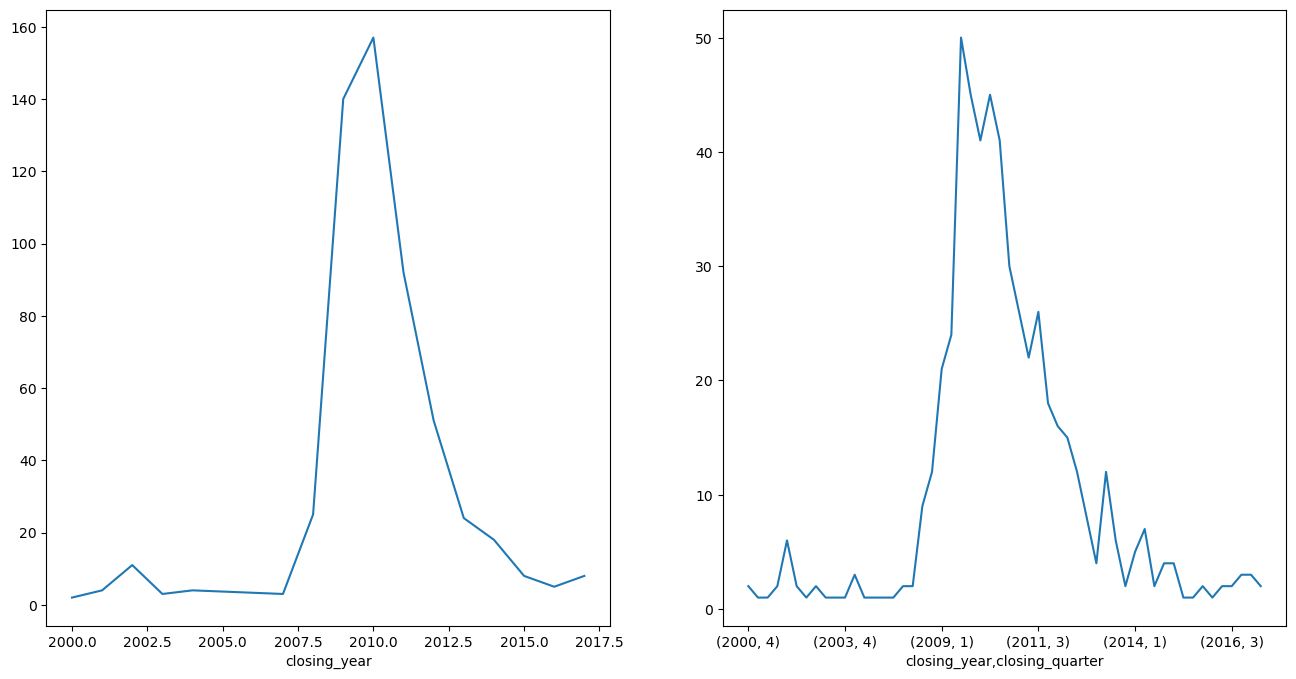

In [42]:
fig,ax = plt.subplots(1,2,figsize=(16,8))

ax[0] = closing_year.plot(ax=ax[0])
ax[1] = closing_year_q.plot(ax=ax[1])
plt.show()